In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from collections import Counter
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=20,10

from sklearn.preprocessing import MinMaxScaler

In [55]:
df = pd.read_csv("all_data.csv", encoding='utf-8')
# get data csv files as a pandas DataFrame

In [4]:
# preview the top-5 rows of the data
df.head()

,state,Bachelor's degree,Graduate or professional degree,High school graduate (includes equivalency),year,proportion of women,Position_Governor,Position_Lt. Governor,labour_force_participation,mngmt_job_wage_gap,"over 25 years \bach degree ,wage gap,k",rape_rate,life_exp_m_f,sex_ratio,abortion_rate
0,Alabama,1.173,1.234,1.001,2020,0.157,1.0,0.0,0.782,0.640,25.1,32.7,0.918,93.6,113.548
1,Alaska,1.204,1.181,0.717,2020,0.367,0.0,0.0,0.795,0.779,18.1,154.8,0.938,109.2,164.547
2,Arizona,1.080,1.017,0.969,2020,0.389,0.0,0.0,0.789,0.701,23.2,44.0,0.923,98.8,184.862
3,Arkansas,1.187,1.224,0.921,2020,0.259,0.0,0.0,0.837,0.705,20.1,73.5,0.928,96.4,104.638
4,California,1.101,1.021,0.927,2020,0.308,0.0,1.0,0.764,0.734,18.6,34.2,0.929,98.9,16.075


In [5]:
df.describe() 
#/Users/xuguangjie/Desktop/final-project-233-not-found-main/eda.ipynb

,Bachelor's degree,Graduate or professional degree,High school graduate (includes equivalency),year,proportion of women,Position_Governor,Position_Lt. Governor,labour_force_participation,mngmt_job_wage_gap,"over 25 years \bach degree ,wage gap,k",rape_rate,life_exp_m_f,sex_ratio,abortion_rate
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,1.135270,1.104926,0.946710,2015.500000,0.254140,0.128000,0.248000,0.829236,0.710586,20.284000,41.277000,0.938892,97.717000,226.895706
std,0.059402,0.133877,0.067768,2.875158,0.075865,0.334424,0.432284,0.040525,0.044266,3.644474,17.819729,0.007540,3.118092,268.040331
min,0.994000,0.576000,0.641000,2011.000000,0.094000,0.000000,0.000000,0.732000,0.568000,10.200000,11.400000,0.912000,93.100000,2.714000
25%,1.098000,1.029000,0.917000,2013.000000,0.199000,0.000000,0.000000,0.803000,0.683000,18.200000,31.075000,0.934000,95.400000,121.059250
50%,1.127000,1.104000,0.955000,2015.500000,0.253000,0.000000,0.000000,0.826000,0.709000,20.100000,38.600000,0.940000,97.100000,188.740000
75%,1.163000,1.182500,0.993000,2018.000000,0.304250,0.000000,0.000000,0.862250,0.736000,22.225000,47.100000,0.944000,99.100000,257.928250
max,1.394000,1.521000,1.113000,2020.000000,0.540000,1.000000,1.000000,0.929000,0.841000,32.100000,161.600000,0.958000,111.200000,3700.745000


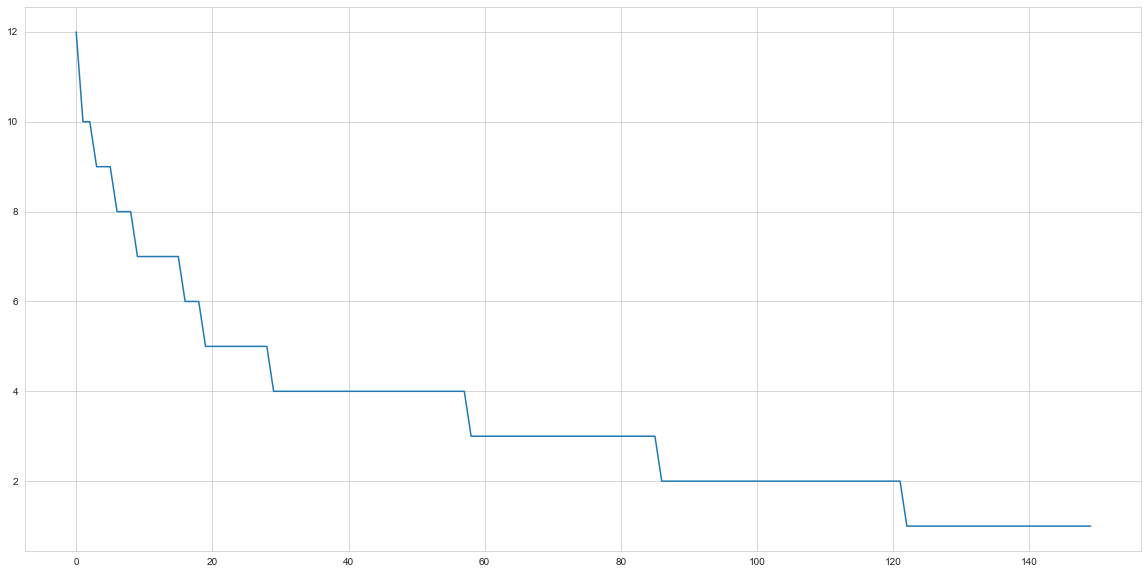

In [9]:
plt.plot(df["labour_force_participation"].value_counts().values)

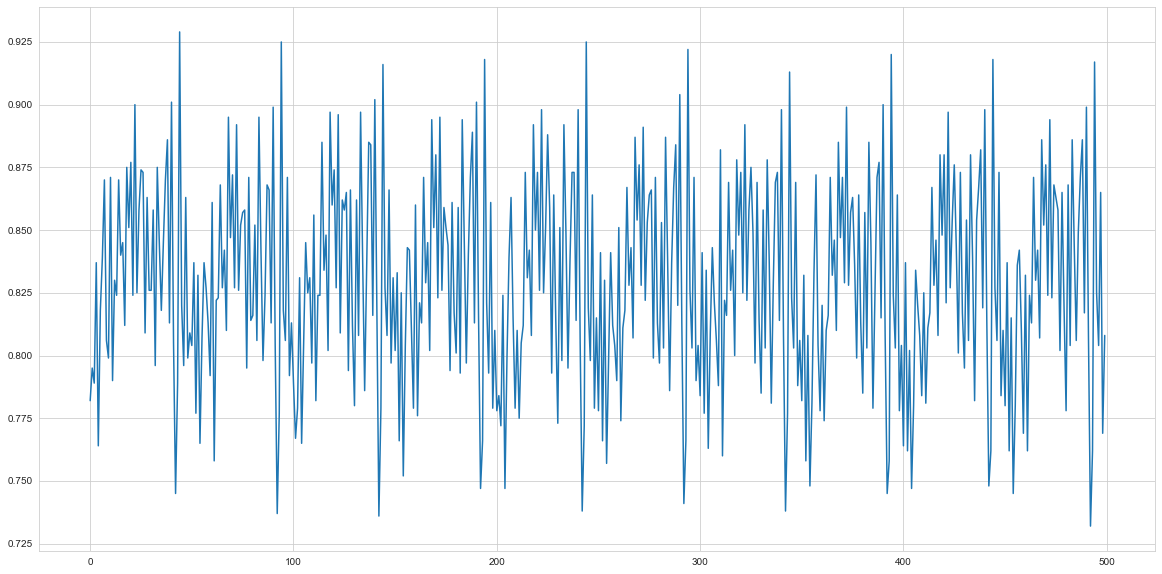

In [10]:
plt.plot(df["labour_force_participation"],label='Close Price history')

In [13]:
import pandas as pd
import plotly.express as px

# 读取数据集

# 将数据按照州和时间进行分组
grouped = df.groupby(['state', 'year'])["labour_force_participation"].sum().reset_index()

# 创建交互式图表
fig = px.line(grouped, x='year', y="labour_force_participation", color='state')

# 添加下拉菜单交互组件
fig.update_layout(
    updatemenus=[
        dict(
            type='buttons',
            showactive=True,
            buttons=[
                dict(label='2011-2020', method='update',
                     args=[{'visible': grouped['year'].between(2011, 2020)},
                           {'title': '2011-2020'}]),
                
            ]
        )
    ]
)

# 显示图表
fig.show()


In [14]:
import pandas as pd
import plotly.graph_objs as go



# 将数据按照年份和州进行分组
grouped = df.groupby(['year', 'state'])["labour_force_participation"].sum().reset_index()

# 创建箱线图数据
data = []
for year in grouped['year'].unique():
    year_data = grouped[grouped['year'] == year]
    data.append(
        go.Box(
            x=year_data['state'],
            y=year_data["labour_force_participation"],
            name=str(year),
            boxpoints='outliers',
            marker=dict(
                size=3
            ),
            line=dict(
                width=1
            )
        )
    )

# 标记最高、最低和中位数值
for i in range(len(data)):
    year_data = grouped[grouped['year'] == data[i]['name']]
    max_value = year_data["labour_force_participation"].max()
    min_value = year_data["labour_force_participation"].min()
    median_value = year_data["labour_force_participation"].median()

    data[i]['text'] = ['Max: {}<br>Min: {}<br>Median: {}'.format(max_value, min_value, median_value)] * len(year_data)

# 创建布局
layout = go.Layout(
    title='Value Change by Year and State',
    yaxis=dict(
        title="labour_force_participation"
    ),
    boxmode='group',
    boxgroupgap=0.2
)

# 创建图表
fig = go.Figure(data=data, layout=layout)

# 显示图表
fig.show()


In [16]:
import pandas as pd
import plotly.graph_objs as go


# 将数据按照年份进行分组
grouped = df.groupby(['year'])["labour_force_participation"].agg(['max', 'min', 'median']).reset_index()

# 创建散点图数据
data = [
    go.Scatter(
        x=grouped['year'],
        y=grouped['max'],
        name='Max',
        mode='markers+lines',
        marker=dict(
            color='red'
        )
    ),
    go.Scatter(
        x=grouped['year'],
        y=grouped['min'],
        name='Min',
        mode='markers+lines',
        marker=dict(
            color='blue'
        )
    ),
    go.Scatter(
        x=grouped['year'],
        y=grouped['median'],
        name='Median',
        mode='markers+lines',
        marker=dict(
            color='green'
        )
    )
]

# 创建布局
layout = go.Layout(
    title='Value Change by Year',
    xaxis=dict(
        title='Year'
    ),
    yaxis=dict(
        title='Value'
    )
)

# 创建图表
fig = go.Figure(data=data, layout=layout)

# 显示图表
fig.show()


In [19]:
import pandas as pd
import plotly.graph_objs as go

# 读取数据集并按每年进行分组

groups = df.groupby('year')

# 定义颜色
colors = {'top10': 'blue', 'bottom10': 'red', 'middle': 'green'}

# 循环处理每个年份的数据
traces = []
for year, group in groups:
    # 计算每个州的数据在该年中所占百分比
    total = group["labour_force_participation"].sum()
    group['Percent'] = group["labour_force_participation"] / total * 100

    # 按照百分比大小进行排序，并将排名转换为百分比
    group = group.sort_values('Percent', ascending=False)
    group['Rank'] = group['Percent'].rank(pct=True) * 100

    # 确定前10%和后10%的州和中间45%到55%的州
    top10 = group[group['Rank'] >= 90]
    bottom10 = group[group['Rank'] <= 10]
    middle = group[(group['Rank'] >= 45) & (group['Rank'] <= 55)]

    # 绘制三条折线图
    for name, data in [('top10', top10), ('bottom10', bottom10), ('middle', middle)]:
        trace = go.Scatter(
            x=[year]*len(data),
            y=data["labour_force_participation"],
            mode='lines',
            name=name,
            line=dict(color=colors[name], width=2),
        )
        traces.append(trace)

# 设置图形布局并绘制图形
layout = go.Layout(
    title='Data Changes',
    xaxis=dict(title='year'),
    yaxis=dict(title="labour_force_participation"),
)
fig = go.Figure(data=traces, layout=layout)
fig.show()


In [21]:
import pandas as pd
import plotly.graph_objs as go

# 读取数据集并按每年进行分组
groups = df.groupby('year')

# 定义颜色
colors = {'top10': 'blue', 'bottom10': 'red', 'middle': 'green'}

# 循环处理每个年份的数据
traces = []
for year, group in groups:
    # 计算每个州的数据在该年中所占百分比
    total = group['labour_force_participation'].sum()
    group['Percent'] = group['labour_force_participation'] / total * 100

    # 按照百分比大小进行排序，并将排名转换为百分比
    group = group.sort_values('Percent', ascending=False)
    group['Rank'] = group['Percent'].rank(pct=True) * 100

    # 确定前10%和后10%的州和中间45%到55%的州
    top10 = group[group['Rank'] >= 90]
    bottom10 = group[group['Rank'] <= 10]
    middle = group[(group['Rank'] >= 45) & (group['Rank'] <= 55)]

    # 合并前10%、后10%和中间45%到55%的州的数据
    selected = pd.concat([top10, bottom10, middle])

    # 绘制折线图
    trace = go.Scatter(
        x=[year]*len(selected),
        y=selected['labour_force_participation'],
        mode='lines',
        name=str(year),
        line=dict(color=colors['top10'], width=2),
    )
    traces.append(trace)

# 设置图形布局并绘制图形
layout = go.Layout(
    title='Labour Force Participation Changes',
    xaxis=dict(title='Year'),
    yaxis=dict(title='Labour Force Participation'),
)
fig = go.Figure(data=traces, layout=layout)
fig.show()


In [22]:
import pandas as pd
import plotly.graph_objs as go


# 计算每个州每年的百分位数
df["percentile"] = df.groupby("year")["labour_force_participation"].apply(
    lambda x: pd.qcut(x, [0, 0.1, 0.9, 1], labels=["bottom_10", "middle_80", "top_10"])
)

# 计算每个州每年的平均值
# df = df.groupby(["year", "percentile"])["labour_force_participation"].mean().reset_index()

# 将数据转换成二维表格
df = df.pivot(index="year", columns="percentile", values="labour_force_participation")

# 绘制折线图
fig = go.Figure()
fig.add_trace(go.Scatter(x=df.index, y=df["bottom_10"], mode="lines", name="bottom_10",
                         line=dict(color="red", width=2)))
fig.add_trace(go.Scatter(x=df.index, y=df["middle_80"], mode="lines", name="middle_80",
                         line=dict(color="blue", width=2)))
fig.add_trace(go.Scatter(x=df.index, y=df["top_10"], mode="lines", name="top_10",
                         line=dict(color="green", width=2)))

# 设置图形属性
fig.update_layout(title="Labour Force Participation by Percentile", xaxis_title="Year", yaxis_title="Participation Rate")

# 显示图形
fig.show()


ValueError: Index contains duplicate entries, cannot reshape

In [47]:
import plotly.graph_objs as go
import pandas as pd



# 计算每个州每年的排名百分比
df['pct_rank'] = df[df['year'] == 2011]['labour_force_participation'].rank(pct=True)

# 根据排名百分比将州分为三组
df['group'] = pd.cut(df['pct_rank'], bins=[0, 0.1, 0.45, 0.55, 0.9, 1.0], labels=[r'前10%', r'10%-45%', r'45%-55%', r'55%-90%', r'后10%'])

# 将每个州的数据单独处理并存储在字典中
states_data = {}
for state, data in df.groupby('state'):
    # 对数据按照年份进行排序
    data = data.sort_values('year')
    # 构造Plotly的Trace对象
    trace = go.Scatter(
        x=data['year'],
        y=data['labour_force_participation'],
        name=state,
        line=dict(width=2),
        mode='lines',
        text=data['labour_force_participation'],
        hovertemplate='<b>%{text:.2f}%</b><br>州: %{name}<br>年份: %{x}'
    )
    # 根据州属于哪个组分配对应的颜色
    if r'前10%' in data['group'].unique():
        
        trace.update(line=dict(color='#FF4136'))
        states_data[state] = trace

    elif r'后10%' in data['group'].unique():
        trace.update(line=dict(color='#0074D9'))
        states_data[state] = trace

    elif r'45%-55%' in data['group'].unique():
        trace.update(line=dict(color='#2ECC40'))
        states_data[state] = trace

    # 存储每个州的Trace对象

# 构造Plotly的Figure对象
fig = go.Figure(list(states_data.values()))

# 添加图表标题和轴标签
fig.update_layout(title='每年50个州劳动参与率变化',
                  xaxis_title='年份',
                  yaxis_title='劳动参与率')

# 显示图表
fig.show()


In [40]:
import pandas as pd
import plotly.graph_objs as go


# 按年份和劳动力参与率排序
df = df.sort_values(['year', 'labour_force_participation'])

# 筛选出前10%、后10%和中间45%到55%总共15个州的数据
n_states = 50
n_years = 10
n_top_bottom = int(n_states * 0.1)
n_middle = int(n_states * 0.1)

top_states = df.groupby('year').tail(n_top_bottom)
# print(top_states[0][1])


bottom_states = df.groupby('year').head(n_top_bottom)
middle_states = df.groupby('year').apply(lambda x: x.nlargest(n_middle, 'labour_force_participation').nsmallest(n_middle, 'labour_force_participation'))

selected_states = pd.concat([top_states, middle_states, bottom_states]).sort_values(['year', 'labour_force_participation'])
# print(selected_states['state'],2)
# 绘制折线图
colors = {'top': 'red', 'middle': 'blue', 'bottom': 'green'}
fig = go.Figure()

for state in selected_states['state'].unique():
    print(state)
    state_data = selected_states[selected_states['state'] == state]
    fig.add_trace(go.Scatter(x=state_data['year'], y=state_data['labour_force_participation'],
                             mode='lines', name=state,
                             line=dict(color=colors['top'], width=2)))

    # 标注数据
    last_data = state_data.tail(1)
    fig.add_annotation(x=last_data['year'], y=last_data['labour_force_participation'],
                       text=state, showarrow=False,
                       font=dict(size=10, color=colors['bottom']))

# 设置图表布局
fig.update_layout(title='Labour Force Participation Rate by State',
                  xaxis_title='Year', yaxis_title='Labour Force Participation Rate')

# 显示图表
fig.show()


Texas
California
Arizona
Idaho
Utah
North Dakota
Rhode Island
Maine
Minnesota
South Dakota
Vermont
Alabama
New Mexico
Hawaii
Alaska
Massachusetts


In [48]:
import pandas as pd


# 将“Year”列设置为索引列
df.set_index('year', inplace=True)

# 计算每年50个州的平均强奸率
rape_rate_avg = df.groupby('year')['rape_rate'].mean()

print(rape_rate_avg.head())


year
2011    31.036
2012    30.838
2013    40.004
2014    39.884
2015    42.686
Name: rape_rate, dtype: float64


In [49]:
import plotly.graph_objs as go

# 创建折线图数据
data = go.Scatter(x=rape_rate_avg.index, y=rape_rate_avg.values)

# 创建布局
layout = go.Layout(title='Average Rape Rate per Year', xaxis=dict(title='Year'), yaxis=dict(title='Average Rape Rate'))

# 绘制折线图
fig = go.Figure(data=[data], layout=layout)
fig.show()


In [50]:
import pandas as pd
import plotly.graph_objs as go


# 将数据按照年份进行分组
grouped = df.groupby(['year'])['rape_rate'].agg(['max', 'min', 'median']).reset_index()

# 创建散点图数据
data = [
    go.Scatter(
        x=grouped['year'],
        y=grouped['max'],
        name='Max',
        mode='markers+lines',
        marker=dict(
            color='red'
        )
    ),
    go.Scatter(
        x=grouped['year'],
        y=grouped['min'],
        name='Min',
        mode='markers+lines',
        marker=dict(
            color='blue'
        )
    ),
    go.Scatter(
        x=grouped['year'],
        y=grouped['median'],
        name='Median',
        mode='markers+lines',
        marker=dict(
            color='green'
        )
    )
]

# 创建布局
layout = go.Layout(
    title='Value Change by Year',
    xaxis=dict(
        title='Year'
    ),
    yaxis=dict(
        title='Value'
    )
)

# 创建图表
fig = go.Figure(data=data, layout=layout)

# 显示图表
fig.show()

In [63]:
import pandas as pd
import plotly.graph_objs as go


# 将“Year”列设置为索引列
# df.set_index('year', inplace=True)

# 去除阿拉斯加的数据
sf = df[df['state'] != 'Alaska']

# 计算每年50个州的平均强奸率
rape_rate_avg = sf.groupby('year')['rape_rate'].mean()

# 创建折线图数据
data = go.Scatter(x=rape_rate_avg.index, y=rape_rate_avg.values)

# 计算平均强奸率的平均值
avg_rate_mean = rape_rate_avg.mean()

# 创建平均值折线图数据
avg_data = go.Scatter(x=rape_rate_avg.index, y=[avg_rate_mean] * len(rape_rate_avg.index), mode='lines', name='Average')

# 创建布局
layout = go.Layout(title='Average Rape Rate per Year', xaxis=dict(title='year'), yaxis=dict(title='Average Rape Rate'))

# 绘制折线图
fig = go.Figure(data=[data, avg_data], layout=layout)
fig.show()


year
2011    30.440816
2012    29.840816
2013    38.261224
2014    38.561224
2015    41.067347
2016    42.285714
2017    44.287755
2018    44.630612
2019    45.569388
2020    41.438776
Name: rape_rate, dtype: float64


In [64]:
df['year']

KeyError: 'year'

In [65]:
import numpy as np

# 计算前25%和后25%的数值线
q1 = df['rape_rate'].quantile(0.25)
q3 = df['rape_rate'].quantile(0.75)

# 创建数值线的水平线数据
hlines = [
    go.Scatter(
        x=grouped['year'],
        y=np.full(len(grouped), q),
        mode='lines',
        name=f'{q*100}%',
        line=dict(
            dash='dash',
            color='gray'
        )
    ) for q in [q1, q3]
]

# 将水平线数据添加到图表中
fig.add_traces(hlines)


In [68]:
import numpy as np
import plotly.graph_objs as go

grouped = df.groupby(['year'])['rape_rate'].agg(['top25%','last25%','max', 'min', 'median']).reset_index()

# # 计算前25%和后25%的数值线
# q1 = df['rape_rate'].quantile(0.25)
# q3 = df['rape_rate'].quantile(0.75)

# 创建散点图数据
data = [
    go.Scatter(
        x=grouped['year'],
        y=grouped['max'],
        name='Max',
        mode='markers+lines',
        marker=dict(
            color='red'
        )
    ),
    go.Scatter(
        x=grouped['year'],
        y=grouped['top25%'],
        name='Top',
        mode='markers+lines',
        marker=dict(
            color='gray'
        )
    ),
    go.Scatter(
        x=grouped['year'],
        y=grouped['last25%'],
        name='last25%',
        mode='markers+lines',
        marker=dict(
            color='gray'
        )
    ),
    go.Scatter(
        x=grouped['year'],
        y=grouped['min'],
        name='Min',
        mode='markers+lines',
        marker=dict(
            color='blue'
        )
    ),
    go.Scatter(
        x=grouped['year'],
        y=grouped['median'],
        name='Median',
        mode='markers+lines',
        marker=dict(
            color='green'
        )
    )
]

# # 创建前25%和后25%数值线的水平线数据
# hlines = [
#     go.Scatter(
#         x=grouped['year'],
#         y=np.full(len(grouped), q),
#         mode='lines',
#         name=f'{q*100}%',
#         line=dict(
#             dash='dash',
#             color='gray'
#         )
#     ) for q in [q1, q3]
# ]

# # 将水平线数据添加到图表中
# data += hlines

# 创建布局
layout = go.Layout(
    title='Value Change by Year',
    xaxis=dict(
        title='Year'
    ),
    yaxis=dict(
        title='Value'
    )
)

# 创建图表
fig = go.Figure(data=data, layout=layout)

# 显示图表
fig.show()


AttributeError: 'SeriesGroupBy' object has no attribute 'top25%'

In [72]:
import numpy as np
import plotly.graph_objs as go

# 计算每年数据的25%数值线
q1 = df.groupby(['year'])['rape_rate'].quantile(0.25).reset_index()
q3 = df.groupby(['year'])['rape_rate'].quantile(0.75).reset_index()

# 合并数据
grouped = df.groupby(['year'])['rape_rate'].agg(['max', 'min', 'median']).reset_index()
grouped = pd.merge(grouped, q1, on='year')
grouped = pd.merge(grouped, q3, on='year')

# 创建散点图数据
data = [
    # go.Scatter(
    #     x=grouped['year'],
    #     y=grouped['max'],
    #     name='Max',
    #     mode='markers+lines',
    #     marker=dict(
    #         color='red'
    #     )
    # ),
    go.Scatter(
        x=grouped['year'],
        y=grouped['min'],
        name='Min',
        mode='markers+lines',
        marker=dict(
            color='blue'
        )
    ),
    go.Scatter(
        x=grouped['year'],
        y=grouped['median'],
        name='Median',
        mode='markers+lines',
        marker=dict(
            color='green'
        )
    ),
    go.Scatter(
        x=q1['year'],
        y=q1['rape_rate'],
        name='25% Line',
        mode='markers+lines',
        line=dict(
            color='purple'
        )
    ),
    go.Scatter(
        x=q3['year'],
        y=q3['rape_rate'],
        name='75% Line',
        mode='markers+lines',
        line=dict(
            color='purple'
        )
    )
]

# 创建布局
layout = go.Layout(
    title='Value Change by Year',
    xaxis=dict(
        title='Year'
    ),
    yaxis=dict(
        title='Value'
    )
)

# 创建图表
fig = go.Figure(data=data, layout=layout)
fig.update_layout(width=1200,
                height=700)

# 显示图表
fig.show()
